In [79]:
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
from utils import columns, dates,metrics, get_data_pred
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from utils import columns

In [35]:
df = pd.read_csv('../data/united_data.csv', index_col=0)

## First let's try some models excluding rows containing nan values

In [23]:
X = df.dropna().drop('Corn_Yield', axis=1)
y = df.dropna()['Corn_Yield']
X_train, X_test, y_train, y_test = train_test_split(X,y)

#### Linear regression is too simple, performs poorly on the data

In [24]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

-7.914700912584371e+23

In [27]:
mean_squared_error(y_test, reg.predict(X_test))

1.733379353544957e+27

#### Multilayer Perceptron seems to perform better, we do a cross-validation and get a mean score of 0.85, with a mean-squared error of 496

In [29]:
reg = MLPRegressor(max_iter=500).fit(X_train, y_train)
reg.score(X_test, y_test)

0.7731336875908982

In [34]:
mean_squared_error(y_test, reg.predict(X_test))

496.8543805863304

In [33]:
cross_val_score(reg, X, y, cv=5).mean()

0.8517745119014897

## Lets try a models that can work with nan values

In [36]:
y = df['Corn_Yield']
X = df.drop(columns=['Corn_Yield'], axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [38]:
reg = HistGradientBoostingRegressor().fit(X_train, y_train)

In [39]:
mse = mean_squared_error(y_test, reg.predict(X_test))
mse

227.550426420556

In [7]:
res_y_test = reg.predict(X_test)
reg.score(X,y)

0.9714351117557671

In [40]:
cross_val_score(reg, X, y, cv=5).mean()

0.9002835791090849

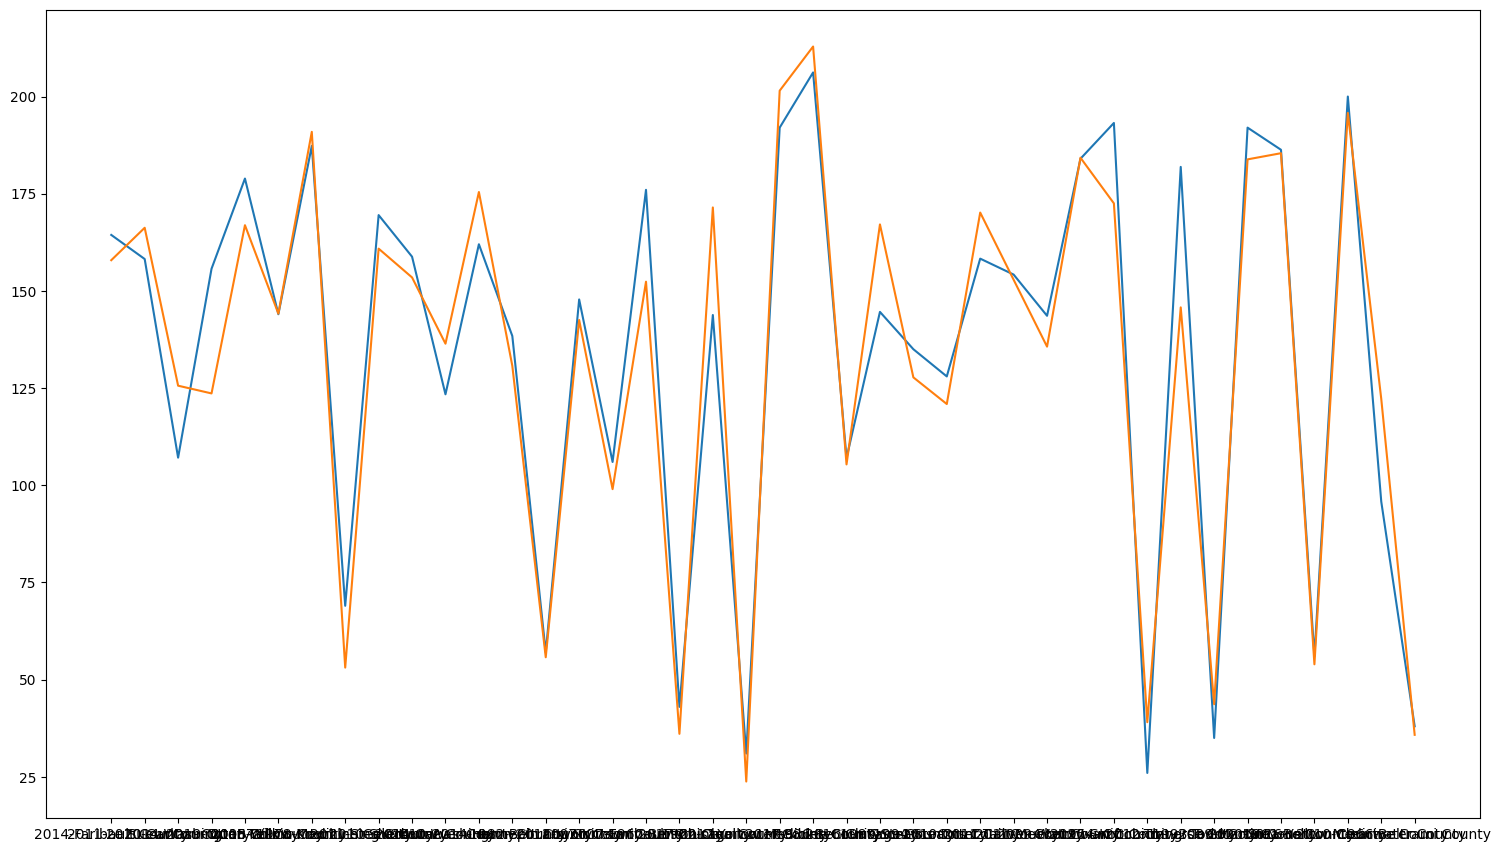

In [41]:
plt.plot(y_test[:40])
plt.plot(res_y_test[:40])
fig = plt.get_current_fig_manager()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [82]:
from lightgbm import LGBMRegressor, plot_importance

In [54]:
reg = LGBMRegressor().fit(X_train, y_train)

In [55]:
mse = mean_squared_error(y_test, reg.predict(X_test))
mse

211.58452389617875

In [45]:
res_y_test = reg.predict(X_test)
reg.score(X,y)

0.9731414953670467

In [81]:
fi = reg.feature_importances_
np.argwhere(fi > 15)
columns[np.argwhere(fi > 10)]

array([['01-31-min'],
       ['02-23-min'],
       ['03-14-max'],
       ['03-16-min'],
       ['05-16-min'],
       ['05-25-min'],
       ['06-10-min'],
       ['06-11-min'],
       ['06-21-avg'],
       ['06-21-min'],
       ['07-04-avg'],
       ['07-05-min'],
       ['07-08-min'],
       ['07-09-avg'],
       ['07-11-min'],
       ['07-24-max'],
       ['07-26-avg'],
       ['07-26-min'],
       ['08-05-avg'],
       ['08-13-prec'],
       ['08-17-avg'],
       ['08-23-avg'],
       ['08-23-min'],
       ['09-06-max'],
       ['09-12-min'],
       ['09-15-min'],
       ['09-16-prec'],
       ['09-21-avg'],
       ['09-23-avg'],
       ['09-24-avg']], dtype='<U10')

In [46]:
cross_val_score(reg, X, y, cv=5).mean()

0.8990104690710894

In [14]:
res = reg.predict(get_data_pred('ACAvNTuEuFWcmwms'))
res

array([104.11670451,  91.48299961, 113.21838351, 131.53536779,
       144.24777163, 105.83118416, 126.40218396, 140.50460566,
       104.39057452, 137.15099623, 128.03177188, 145.49904436,
       106.408852  , 150.90179636, 160.34285337, 121.30853824,
       109.158402  ])

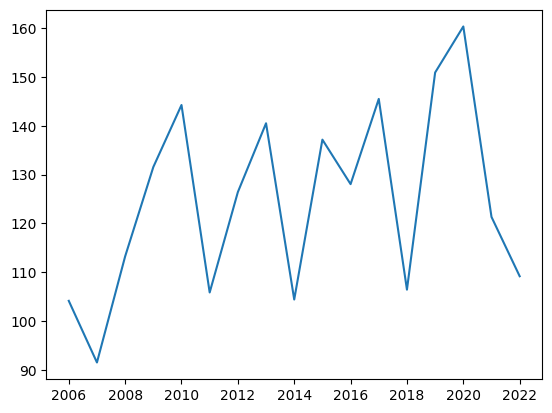

In [15]:
plt.plot( range(2006,2023), res)

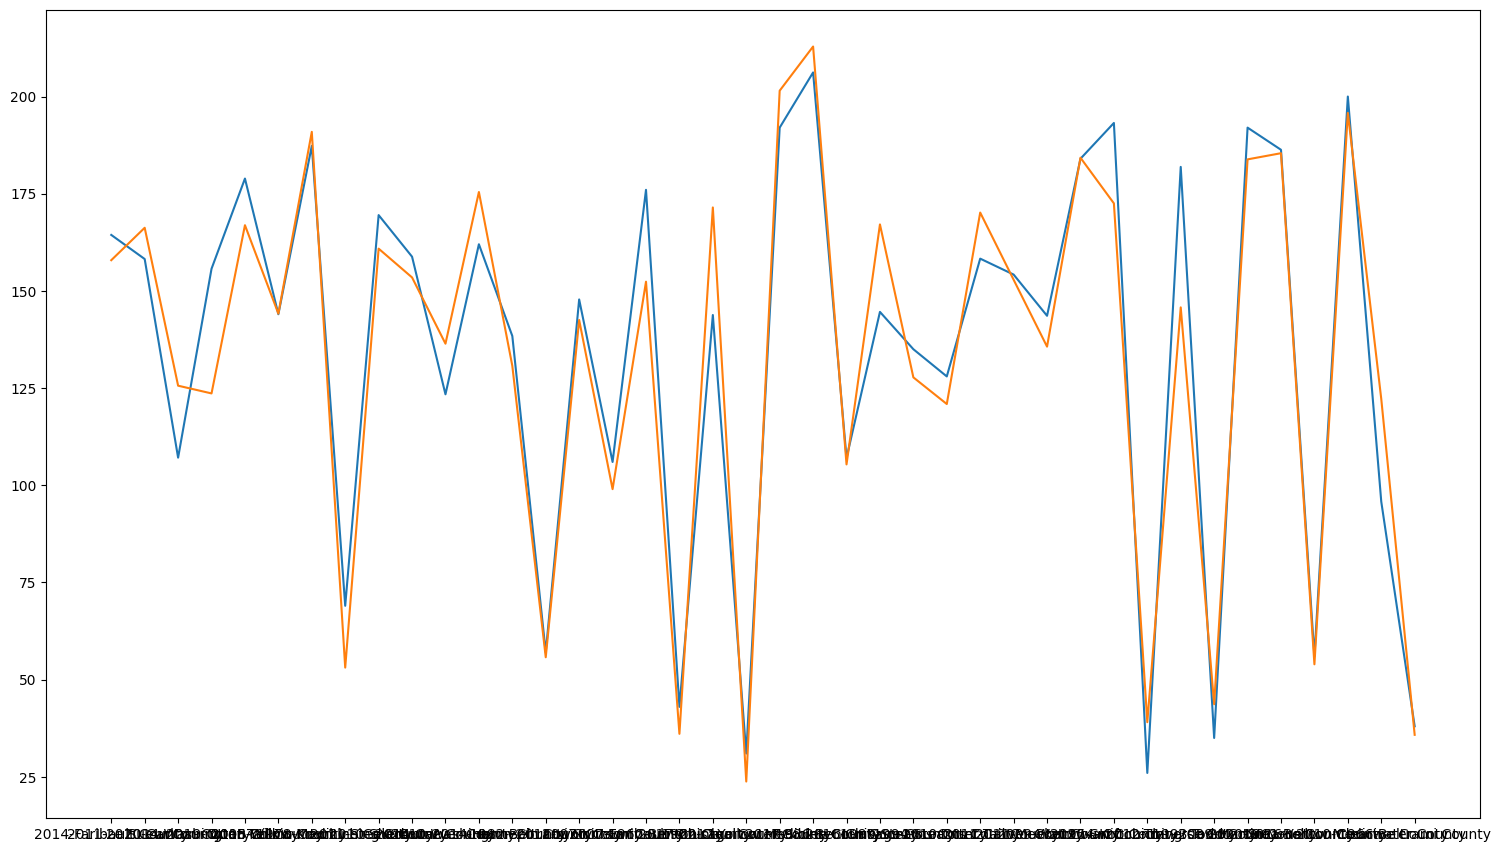

In [16]:
plt.plot(y_test[:40])
plt.plot(res_y_test[:40])
fig = plt.get_current_fig_manager()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [50]:
from catboost import CatBoostRegressor

In [51]:
reg = CatBoostRegressor().fit(X_train, y_train)

Learning rate set to 0.040117
0:	learn: 48.3041137	total: 196ms	remaining: 3m 15s
1:	learn: 47.2602308	total: 251ms	remaining: 2m 5s
2:	learn: 46.3137621	total: 306ms	remaining: 1m 41s
3:	learn: 45.3205163	total: 360ms	remaining: 1m 29s
4:	learn: 44.4201802	total: 413ms	remaining: 1m 22s
5:	learn: 43.5009316	total: 465ms	remaining: 1m 16s
6:	learn: 42.6620925	total: 521ms	remaining: 1m 13s
7:	learn: 41.8295267	total: 575ms	remaining: 1m 11s
8:	learn: 41.0853351	total: 629ms	remaining: 1m 9s
9:	learn: 40.2930699	total: 680ms	remaining: 1m 7s
10:	learn: 39.5182976	total: 737ms	remaining: 1m 6s
11:	learn: 38.8194234	total: 790ms	remaining: 1m 5s
12:	learn: 37.9908853	total: 841ms	remaining: 1m 3s
13:	learn: 37.3170342	total: 895ms	remaining: 1m 3s
14:	learn: 36.6780959	total: 949ms	remaining: 1m 2s
15:	learn: 35.9750440	total: 1s	remaining: 1m 1s
16:	learn: 35.3171857	total: 1.05s	remaining: 1m
17:	learn: 34.6441416	total: 1.11s	remaining: 1m
18:	learn: 34.1063105	total: 1.16s	remaining: 

157:	learn: 12.2577545	total: 8.76s	remaining: 46.7s
158:	learn: 12.2361204	total: 8.81s	remaining: 46.6s
159:	learn: 12.1952454	total: 8.87s	remaining: 46.6s
160:	learn: 12.1487345	total: 8.93s	remaining: 46.5s
161:	learn: 12.1115972	total: 8.98s	remaining: 46.5s
162:	learn: 12.0772542	total: 9.04s	remaining: 46.4s
163:	learn: 12.0503445	total: 9.09s	remaining: 46.3s
164:	learn: 12.0145779	total: 9.14s	remaining: 46.3s
165:	learn: 11.9751912	total: 9.19s	remaining: 46.2s
166:	learn: 11.9414314	total: 9.24s	remaining: 46.1s
167:	learn: 11.9059742	total: 9.3s	remaining: 46s
168:	learn: 11.8765534	total: 9.35s	remaining: 46s
169:	learn: 11.8224708	total: 9.4s	remaining: 45.9s
170:	learn: 11.7736658	total: 9.46s	remaining: 45.8s
171:	learn: 11.7287975	total: 9.51s	remaining: 45.8s
172:	learn: 11.6972460	total: 9.56s	remaining: 45.7s
173:	learn: 11.6621852	total: 9.61s	remaining: 45.6s
174:	learn: 11.6301526	total: 9.66s	remaining: 45.6s
175:	learn: 11.6016339	total: 9.72s	remaining: 45.5s

316:	learn: 7.8835134	total: 17.3s	remaining: 37.3s
317:	learn: 7.8600896	total: 17.3s	remaining: 37.2s
318:	learn: 7.8378040	total: 17.4s	remaining: 37.1s
319:	learn: 7.8111371	total: 17.4s	remaining: 37.1s
320:	learn: 7.7910920	total: 17.5s	remaining: 37s
321:	learn: 7.7741086	total: 17.6s	remaining: 37s
322:	learn: 7.7687134	total: 17.6s	remaining: 36.9s
323:	learn: 7.7578301	total: 17.7s	remaining: 36.8s
324:	learn: 7.7433488	total: 17.7s	remaining: 36.8s
325:	learn: 7.7164045	total: 17.8s	remaining: 36.7s
326:	learn: 7.6971194	total: 17.8s	remaining: 36.6s
327:	learn: 7.6841251	total: 17.9s	remaining: 36.6s
328:	learn: 7.6692856	total: 17.9s	remaining: 36.5s
329:	learn: 7.6500272	total: 18s	remaining: 36.5s
330:	learn: 7.6342747	total: 18s	remaining: 36.4s
331:	learn: 7.6159132	total: 18.1s	remaining: 36.4s
332:	learn: 7.5957766	total: 18.1s	remaining: 36.3s
333:	learn: 7.5737693	total: 18.2s	remaining: 36.2s
334:	learn: 7.5540653	total: 18.2s	remaining: 36.2s
335:	learn: 7.541743

475:	learn: 5.9476452	total: 25.6s	remaining: 28.1s
476:	learn: 5.9394979	total: 25.6s	remaining: 28.1s
477:	learn: 5.9301669	total: 25.7s	remaining: 28s
478:	learn: 5.9236489	total: 25.7s	remaining: 28s
479:	learn: 5.9153629	total: 25.8s	remaining: 27.9s
480:	learn: 5.9138097	total: 25.8s	remaining: 27.9s
481:	learn: 5.9033230	total: 25.9s	remaining: 27.8s
482:	learn: 5.8940493	total: 25.9s	remaining: 27.7s
483:	learn: 5.8919332	total: 26s	remaining: 27.7s
484:	learn: 5.8834521	total: 26s	remaining: 27.6s
485:	learn: 5.8728200	total: 26.1s	remaining: 27.6s
486:	learn: 5.8707211	total: 26.1s	remaining: 27.5s
487:	learn: 5.8570233	total: 26.2s	remaining: 27.5s
488:	learn: 5.8489158	total: 26.2s	remaining: 27.4s
489:	learn: 5.8463627	total: 26.3s	remaining: 27.4s
490:	learn: 5.8390934	total: 26.3s	remaining: 27.3s
491:	learn: 5.8352971	total: 26.4s	remaining: 27.3s
492:	learn: 5.8279842	total: 26.4s	remaining: 27.2s
493:	learn: 5.8212294	total: 26.5s	remaining: 27.1s
494:	learn: 5.807126

637:	learn: 5.0301518	total: 34.1s	remaining: 19.4s
638:	learn: 5.0253752	total: 34.2s	remaining: 19.3s
639:	learn: 5.0230270	total: 34.2s	remaining: 19.3s
640:	learn: 5.0160443	total: 34.3s	remaining: 19.2s
641:	learn: 5.0106643	total: 34.3s	remaining: 19.1s
642:	learn: 5.0046611	total: 34.4s	remaining: 19.1s
643:	learn: 5.0020154	total: 34.4s	remaining: 19s
644:	learn: 4.9973103	total: 34.5s	remaining: 19s
645:	learn: 4.9903594	total: 34.6s	remaining: 18.9s
646:	learn: 4.9867320	total: 34.6s	remaining: 18.9s
647:	learn: 4.9812127	total: 34.7s	remaining: 18.8s
648:	learn: 4.9775794	total: 34.7s	remaining: 18.8s
649:	learn: 4.9729664	total: 34.8s	remaining: 18.7s
650:	learn: 4.9674364	total: 34.8s	remaining: 18.7s
651:	learn: 4.9623255	total: 34.9s	remaining: 18.6s
652:	learn: 4.9592136	total: 34.9s	remaining: 18.6s
653:	learn: 4.9552186	total: 35s	remaining: 18.5s
654:	learn: 4.9490158	total: 35s	remaining: 18.5s
655:	learn: 4.9447106	total: 35.1s	remaining: 18.4s
656:	learn: 4.940062

799:	learn: 4.5166232	total: 42.7s	remaining: 10.7s
800:	learn: 4.5133939	total: 42.7s	remaining: 10.6s
801:	learn: 4.5122207	total: 42.8s	remaining: 10.6s
802:	learn: 4.5091925	total: 42.8s	remaining: 10.5s
803:	learn: 4.5067717	total: 42.9s	remaining: 10.5s
804:	learn: 4.5034820	total: 43s	remaining: 10.4s
805:	learn: 4.4996569	total: 43s	remaining: 10.3s
806:	learn: 4.4987810	total: 43.1s	remaining: 10.3s
807:	learn: 4.4964369	total: 43.1s	remaining: 10.2s
808:	learn: 4.4951943	total: 43.2s	remaining: 10.2s
809:	learn: 4.4917761	total: 43.2s	remaining: 10.1s
810:	learn: 4.4897186	total: 43.3s	remaining: 10.1s
811:	learn: 4.4865197	total: 43.3s	remaining: 10s
812:	learn: 4.4827742	total: 43.4s	remaining: 9.97s
813:	learn: 4.4824236	total: 43.4s	remaining: 9.92s
814:	learn: 4.4814870	total: 43.5s	remaining: 9.87s
815:	learn: 4.4792136	total: 43.5s	remaining: 9.81s
816:	learn: 4.4752774	total: 43.6s	remaining: 9.76s
817:	learn: 4.4726277	total: 43.6s	remaining: 9.71s
818:	learn: 4.4703

961:	learn: 4.2329882	total: 51.2s	remaining: 2.02s
962:	learn: 4.2319382	total: 51.2s	remaining: 1.97s
963:	learn: 4.2317386	total: 51.3s	remaining: 1.91s
964:	learn: 4.2315311	total: 51.3s	remaining: 1.86s
965:	learn: 4.2304739	total: 51.4s	remaining: 1.81s
966:	learn: 4.2274524	total: 51.4s	remaining: 1.75s
967:	learn: 4.2254103	total: 51.5s	remaining: 1.7s
968:	learn: 4.2236022	total: 51.5s	remaining: 1.65s
969:	learn: 4.2232998	total: 51.6s	remaining: 1.59s
970:	learn: 4.2220622	total: 51.6s	remaining: 1.54s
971:	learn: 4.2218000	total: 51.7s	remaining: 1.49s
972:	learn: 4.2200021	total: 51.7s	remaining: 1.44s
973:	learn: 4.2181207	total: 51.8s	remaining: 1.38s
974:	learn: 4.2177798	total: 51.8s	remaining: 1.33s
975:	learn: 4.2163185	total: 51.9s	remaining: 1.28s
976:	learn: 4.2144171	total: 52s	remaining: 1.22s
977:	learn: 4.2141510	total: 52s	remaining: 1.17s
978:	learn: 4.2126272	total: 52.1s	remaining: 1.12s
979:	learn: 4.2123963	total: 52.1s	remaining: 1.06s
980:	learn: 4.212

In [52]:
mse = mean_squared_error(y_test, reg.predict(X_test))
mse

207.46028554326486

In [53]:
cross_val_score(reg, X, y, cv=5).mean()

Learning rate set to 0.040524
0:	learn: 48.0823201	total: 64.8ms	remaining: 1m 4s
1:	learn: 47.0699862	total: 117ms	remaining: 58.2s
2:	learn: 46.1542775	total: 167ms	remaining: 55.5s
3:	learn: 45.1371806	total: 236ms	remaining: 58.7s
4:	learn: 44.2062357	total: 290ms	remaining: 57.8s
5:	learn: 43.2902627	total: 341ms	remaining: 56.5s
6:	learn: 42.4026763	total: 394ms	remaining: 55.9s
7:	learn: 41.4915498	total: 445ms	remaining: 55.2s
8:	learn: 40.6530290	total: 499ms	remaining: 55s
9:	learn: 39.8115097	total: 550ms	remaining: 54.5s
10:	learn: 39.0446019	total: 602ms	remaining: 54.1s
11:	learn: 38.3372795	total: 652ms	remaining: 53.7s
12:	learn: 37.5473050	total: 705ms	remaining: 53.5s
13:	learn: 36.7851353	total: 759ms	remaining: 53.5s
14:	learn: 36.1520760	total: 810ms	remaining: 53.2s
15:	learn: 35.4373647	total: 861ms	remaining: 53s
16:	learn: 34.7567258	total: 914ms	remaining: 52.8s
17:	learn: 34.1069841	total: 968ms	remaining: 52.8s
18:	learn: 33.5145539	total: 1.02s	remaining: 5

157:	learn: 11.7454956	total: 8.46s	remaining: 45.1s
158:	learn: 11.7094042	total: 8.52s	remaining: 45.1s
159:	learn: 11.6704124	total: 8.57s	remaining: 45s
160:	learn: 11.6362085	total: 8.62s	remaining: 44.9s
161:	learn: 11.6019770	total: 8.68s	remaining: 44.9s
162:	learn: 11.5618515	total: 8.73s	remaining: 44.9s
163:	learn: 11.5281163	total: 8.79s	remaining: 44.8s
164:	learn: 11.4778783	total: 8.84s	remaining: 44.7s
165:	learn: 11.4561821	total: 8.9s	remaining: 44.7s
166:	learn: 11.3976316	total: 8.95s	remaining: 44.6s
167:	learn: 11.3634424	total: 9s	remaining: 44.6s
168:	learn: 11.3304175	total: 9.05s	remaining: 44.5s
169:	learn: 11.3022536	total: 9.11s	remaining: 44.5s
170:	learn: 11.2766488	total: 9.16s	remaining: 44.4s
171:	learn: 11.2446364	total: 9.21s	remaining: 44.3s
172:	learn: 11.2207163	total: 9.26s	remaining: 44.3s
173:	learn: 11.1909697	total: 9.32s	remaining: 44.2s
174:	learn: 11.1542123	total: 9.37s	remaining: 44.2s
175:	learn: 11.1215149	total: 9.42s	remaining: 44.1s

317:	learn: 7.7678847	total: 17.1s	remaining: 36.6s
318:	learn: 7.7604530	total: 17.1s	remaining: 36.5s
319:	learn: 7.7581347	total: 17.2s	remaining: 36.5s
320:	learn: 7.7427328	total: 17.2s	remaining: 36.4s
321:	learn: 7.7388435	total: 17.3s	remaining: 36.4s
322:	learn: 7.7230914	total: 17.3s	remaining: 36.3s
323:	learn: 7.7212415	total: 17.4s	remaining: 36.3s
324:	learn: 7.7140105	total: 17.4s	remaining: 36.2s
325:	learn: 7.7009211	total: 17.5s	remaining: 36.1s
326:	learn: 7.6843669	total: 17.5s	remaining: 36.1s
327:	learn: 7.6824129	total: 17.6s	remaining: 36s
328:	learn: 7.6677763	total: 17.6s	remaining: 36s
329:	learn: 7.6551022	total: 17.7s	remaining: 35.9s
330:	learn: 7.6395447	total: 17.7s	remaining: 35.9s
331:	learn: 7.6306401	total: 17.8s	remaining: 35.8s
332:	learn: 7.6096846	total: 17.8s	remaining: 35.8s
333:	learn: 7.5980572	total: 17.9s	remaining: 35.7s
334:	learn: 7.5810448	total: 18s	remaining: 35.6s
335:	learn: 7.5600517	total: 18s	remaining: 35.6s
336:	learn: 7.557779

477:	learn: 6.1992349	total: 25.7s	remaining: 28s
478:	learn: 6.1885427	total: 25.7s	remaining: 28s
479:	learn: 6.1859038	total: 25.8s	remaining: 27.9s
480:	learn: 6.1844385	total: 25.8s	remaining: 27.8s
481:	learn: 6.1751195	total: 25.9s	remaining: 27.8s
482:	learn: 6.1728018	total: 25.9s	remaining: 27.7s
483:	learn: 6.1633659	total: 26s	remaining: 27.7s
484:	learn: 6.1560355	total: 26s	remaining: 27.6s
485:	learn: 6.1477910	total: 26.1s	remaining: 27.6s
486:	learn: 6.1418882	total: 26.1s	remaining: 27.5s
487:	learn: 6.1341100	total: 26.2s	remaining: 27.5s
488:	learn: 6.1249074	total: 26.2s	remaining: 27.4s
489:	learn: 6.1137661	total: 26.3s	remaining: 27.4s
490:	learn: 6.1072256	total: 26.3s	remaining: 27.3s
491:	learn: 6.0992378	total: 26.4s	remaining: 27.2s
492:	learn: 6.0926634	total: 26.4s	remaining: 27.2s
493:	learn: 6.0845163	total: 26.5s	remaining: 27.1s
494:	learn: 6.0787824	total: 26.6s	remaining: 27.1s
495:	learn: 6.0679156	total: 26.6s	remaining: 27s
496:	learn: 6.0667817	

638:	learn: 5.2952498	total: 34.3s	remaining: 19.4s
639:	learn: 5.2905494	total: 34.4s	remaining: 19.3s
640:	learn: 5.2852143	total: 34.4s	remaining: 19.3s
641:	learn: 5.2843822	total: 34.5s	remaining: 19.2s
642:	learn: 5.2815733	total: 34.5s	remaining: 19.2s
643:	learn: 5.2775324	total: 34.6s	remaining: 19.1s
644:	learn: 5.2764225	total: 34.6s	remaining: 19.1s
645:	learn: 5.2695295	total: 34.7s	remaining: 19s
646:	learn: 5.2637270	total: 34.7s	remaining: 19s
647:	learn: 5.2621989	total: 34.8s	remaining: 18.9s
648:	learn: 5.2607055	total: 34.9s	remaining: 18.8s
649:	learn: 5.2564118	total: 34.9s	remaining: 18.8s
650:	learn: 5.2541874	total: 35s	remaining: 18.7s
651:	learn: 5.2490542	total: 35s	remaining: 18.7s
652:	learn: 5.2443742	total: 35.1s	remaining: 18.6s
653:	learn: 5.2384113	total: 35.1s	remaining: 18.6s
654:	learn: 5.2366004	total: 35.2s	remaining: 18.5s
655:	learn: 5.2318438	total: 35.2s	remaining: 18.5s
656:	learn: 5.2306897	total: 35.3s	remaining: 18.4s
657:	learn: 5.225651

799:	learn: 4.7870162	total: 43s	remaining: 10.8s
800:	learn: 4.7865808	total: 43.1s	remaining: 10.7s
801:	learn: 4.7859418	total: 43.1s	remaining: 10.6s
802:	learn: 4.7819258	total: 43.2s	remaining: 10.6s
803:	learn: 4.7787446	total: 43.2s	remaining: 10.5s
804:	learn: 4.7760266	total: 43.3s	remaining: 10.5s
805:	learn: 4.7733080	total: 43.3s	remaining: 10.4s
806:	learn: 4.7727781	total: 43.4s	remaining: 10.4s
807:	learn: 4.7689065	total: 43.4s	remaining: 10.3s
808:	learn: 4.7639600	total: 43.5s	remaining: 10.3s
809:	learn: 4.7617449	total: 43.5s	remaining: 10.2s
810:	learn: 4.7592304	total: 43.6s	remaining: 10.2s
811:	learn: 4.7567312	total: 43.7s	remaining: 10.1s
812:	learn: 4.7561358	total: 43.7s	remaining: 10.1s
813:	learn: 4.7544571	total: 43.8s	remaining: 10s
814:	learn: 4.7540625	total: 43.8s	remaining: 9.94s
815:	learn: 4.7528808	total: 43.9s	remaining: 9.89s
816:	learn: 4.7505101	total: 43.9s	remaining: 9.84s
817:	learn: 4.7500557	total: 44s	remaining: 9.78s
818:	learn: 4.7463

958:	learn: 4.5072776	total: 51.6s	remaining: 2.21s
959:	learn: 4.5055275	total: 51.6s	remaining: 2.15s
960:	learn: 4.5052113	total: 51.7s	remaining: 2.1s
961:	learn: 4.5048829	total: 51.7s	remaining: 2.04s
962:	learn: 4.5036452	total: 51.8s	remaining: 1.99s
963:	learn: 4.5034892	total: 51.8s	remaining: 1.94s
964:	learn: 4.5031790	total: 51.9s	remaining: 1.88s
965:	learn: 4.5012523	total: 52s	remaining: 1.83s
966:	learn: 4.4997676	total: 52s	remaining: 1.77s
967:	learn: 4.4985629	total: 52.1s	remaining: 1.72s
968:	learn: 4.4983751	total: 52.1s	remaining: 1.67s
969:	learn: 4.4966153	total: 52.2s	remaining: 1.61s
970:	learn: 4.4954694	total: 52.2s	remaining: 1.56s
971:	learn: 4.4934675	total: 52.3s	remaining: 1.51s
972:	learn: 4.4918133	total: 52.3s	remaining: 1.45s
973:	learn: 4.4914489	total: 52.4s	remaining: 1.4s
974:	learn: 4.4895959	total: 52.4s	remaining: 1.34s
975:	learn: 4.4886213	total: 52.5s	remaining: 1.29s
976:	learn: 4.4872464	total: 52.6s	remaining: 1.24s
977:	learn: 4.4860

116:	learn: 13.5933308	total: 6.7s	remaining: 50.5s
117:	learn: 13.5344377	total: 6.76s	remaining: 50.5s
118:	learn: 13.4686878	total: 6.82s	remaining: 50.5s
119:	learn: 13.4109104	total: 6.88s	remaining: 50.5s
120:	learn: 13.3615496	total: 6.94s	remaining: 50.4s
121:	learn: 13.3133527	total: 7s	remaining: 50.4s
122:	learn: 13.2698672	total: 7.07s	remaining: 50.4s
123:	learn: 13.2246876	total: 7.13s	remaining: 50.3s
124:	learn: 13.1697579	total: 7.19s	remaining: 50.3s
125:	learn: 13.1118470	total: 7.25s	remaining: 50.3s
126:	learn: 13.0588698	total: 7.3s	remaining: 50.2s
127:	learn: 12.9916194	total: 7.36s	remaining: 50.2s
128:	learn: 12.9457452	total: 7.42s	remaining: 50.1s
129:	learn: 12.8988185	total: 7.48s	remaining: 50.1s
130:	learn: 12.8598235	total: 7.54s	remaining: 50s
131:	learn: 12.8111264	total: 7.6s	remaining: 50s
132:	learn: 12.7700313	total: 7.66s	remaining: 49.9s
133:	learn: 12.7241281	total: 7.71s	remaining: 49.9s
134:	learn: 12.6805650	total: 7.77s	remaining: 49.8s
135

275:	learn: 8.4885733	total: 15.9s	remaining: 41.7s
276:	learn: 8.4626979	total: 16s	remaining: 41.7s
277:	learn: 8.4378688	total: 16s	remaining: 41.6s
278:	learn: 8.4167069	total: 16.1s	remaining: 41.5s
279:	learn: 8.4033248	total: 16.1s	remaining: 41.5s
280:	learn: 8.3740112	total: 16.2s	remaining: 41.4s
281:	learn: 8.3383748	total: 16.2s	remaining: 41.4s
282:	learn: 8.3183904	total: 16.3s	remaining: 41.3s
283:	learn: 8.2939905	total: 16.4s	remaining: 41.3s
284:	learn: 8.2883385	total: 16.4s	remaining: 41.2s
285:	learn: 8.2740160	total: 16.5s	remaining: 41.1s
286:	learn: 8.2438600	total: 16.5s	remaining: 41.1s
287:	learn: 8.2234382	total: 16.6s	remaining: 41s
288:	learn: 8.1993713	total: 16.7s	remaining: 41s
289:	learn: 8.1887631	total: 16.7s	remaining: 40.9s
290:	learn: 8.1663685	total: 16.8s	remaining: 40.8s
291:	learn: 8.1396151	total: 16.8s	remaining: 40.8s
292:	learn: 8.1352624	total: 16.9s	remaining: 40.7s
293:	learn: 8.1142031	total: 16.9s	remaining: 40.7s
294:	learn: 8.109200

436:	learn: 6.4430288	total: 25.1s	remaining: 32.3s
437:	learn: 6.4412239	total: 25.2s	remaining: 32.3s
438:	learn: 6.4305398	total: 25.2s	remaining: 32.2s
439:	learn: 6.4223301	total: 25.3s	remaining: 32.2s
440:	learn: 6.4129954	total: 25.3s	remaining: 32.1s
441:	learn: 6.4045165	total: 25.4s	remaining: 32.1s
442:	learn: 6.3908097	total: 25.4s	remaining: 32s
443:	learn: 6.3766856	total: 25.5s	remaining: 31.9s
444:	learn: 6.3750815	total: 25.6s	remaining: 31.9s
445:	learn: 6.3683184	total: 25.6s	remaining: 31.8s
446:	learn: 6.3566040	total: 25.7s	remaining: 31.8s
447:	learn: 6.3552873	total: 25.7s	remaining: 31.7s
448:	learn: 6.3441035	total: 25.8s	remaining: 31.6s
449:	learn: 6.3334572	total: 25.8s	remaining: 31.6s
450:	learn: 6.3262447	total: 25.9s	remaining: 31.5s
451:	learn: 6.3137279	total: 26s	remaining: 31.5s
452:	learn: 6.3122132	total: 26s	remaining: 31.4s
453:	learn: 6.2963370	total: 26.1s	remaining: 31.4s
454:	learn: 6.2941875	total: 26.1s	remaining: 31.3s
455:	learn: 6.2835

596:	learn: 5.3685597	total: 34.3s	remaining: 23.1s
597:	learn: 5.3619882	total: 34.3s	remaining: 23.1s
598:	learn: 5.3550227	total: 34.4s	remaining: 23s
599:	learn: 5.3522279	total: 34.5s	remaining: 23s
600:	learn: 5.3459923	total: 34.5s	remaining: 22.9s
601:	learn: 5.3372732	total: 34.6s	remaining: 22.9s
602:	learn: 5.3285069	total: 34.6s	remaining: 22.8s
603:	learn: 5.3223718	total: 34.7s	remaining: 22.7s
604:	learn: 5.3182458	total: 34.7s	remaining: 22.7s
605:	learn: 5.3128868	total: 34.8s	remaining: 22.6s
606:	learn: 5.3068509	total: 34.9s	remaining: 22.6s
607:	learn: 5.2987699	total: 34.9s	remaining: 22.5s
608:	learn: 5.2912825	total: 35s	remaining: 22.4s
609:	learn: 5.2855571	total: 35s	remaining: 22.4s
610:	learn: 5.2779465	total: 35.1s	remaining: 22.3s
611:	learn: 5.2714428	total: 35.1s	remaining: 22.3s
612:	learn: 5.2698801	total: 35.2s	remaining: 22.2s
613:	learn: 5.2688677	total: 35.3s	remaining: 22.2s
614:	learn: 5.2647692	total: 35.3s	remaining: 22.1s
615:	learn: 5.262283

756:	learn: 4.7260138	total: 43.4s	remaining: 13.9s
757:	learn: 4.7233810	total: 43.5s	remaining: 13.9s
758:	learn: 4.7193132	total: 43.5s	remaining: 13.8s
759:	learn: 4.7160860	total: 43.6s	remaining: 13.8s
760:	learn: 4.7129553	total: 43.7s	remaining: 13.7s
761:	learn: 4.7106565	total: 43.7s	remaining: 13.7s
762:	learn: 4.7092293	total: 43.8s	remaining: 13.6s
763:	learn: 4.7071224	total: 43.8s	remaining: 13.5s
764:	learn: 4.7035602	total: 43.9s	remaining: 13.5s
765:	learn: 4.7003366	total: 44s	remaining: 13.4s
766:	learn: 4.6958432	total: 44s	remaining: 13.4s
767:	learn: 4.6916637	total: 44.1s	remaining: 13.3s
768:	learn: 4.6882483	total: 44.1s	remaining: 13.3s
769:	learn: 4.6848661	total: 44.2s	remaining: 13.2s
770:	learn: 4.6836001	total: 44.3s	remaining: 13.1s
771:	learn: 4.6824745	total: 44.3s	remaining: 13.1s
772:	learn: 4.6818477	total: 44.4s	remaining: 13s
773:	learn: 4.6786810	total: 44.4s	remaining: 13s
774:	learn: 4.6780100	total: 44.5s	remaining: 12.9s
775:	learn: 4.676555

916:	learn: 4.3519772	total: 52.6s	remaining: 4.76s
917:	learn: 4.3502762	total: 52.6s	remaining: 4.7s
918:	learn: 4.3492390	total: 52.7s	remaining: 4.64s
919:	learn: 4.3476165	total: 52.8s	remaining: 4.59s
920:	learn: 4.3471666	total: 52.8s	remaining: 4.53s
921:	learn: 4.3448219	total: 52.9s	remaining: 4.47s
922:	learn: 4.3431970	total: 52.9s	remaining: 4.41s
923:	learn: 4.3416141	total: 53s	remaining: 4.36s
924:	learn: 4.3405485	total: 53s	remaining: 4.3s
925:	learn: 4.3392991	total: 53.1s	remaining: 4.24s
926:	learn: 4.3367077	total: 53.1s	remaining: 4.18s
927:	learn: 4.3349654	total: 53.2s	remaining: 4.13s
928:	learn: 4.3329139	total: 53.3s	remaining: 4.07s
929:	learn: 4.3309169	total: 53.3s	remaining: 4.01s
930:	learn: 4.3294390	total: 53.4s	remaining: 3.96s
931:	learn: 4.3291643	total: 53.4s	remaining: 3.9s
932:	learn: 4.3270796	total: 53.5s	remaining: 3.84s
933:	learn: 4.3264006	total: 53.6s	remaining: 3.78s
934:	learn: 4.3241709	total: 53.6s	remaining: 3.73s
935:	learn: 4.32269

75:	learn: 17.0427549	total: 4.16s	remaining: 50.5s
76:	learn: 16.9111561	total: 4.21s	remaining: 50.5s
77:	learn: 16.7800117	total: 4.26s	remaining: 50.4s
78:	learn: 16.6527968	total: 4.32s	remaining: 50.3s
79:	learn: 16.5105488	total: 4.37s	remaining: 50.3s
80:	learn: 16.3918891	total: 4.44s	remaining: 50.3s
81:	learn: 16.2902833	total: 4.49s	remaining: 50.3s
82:	learn: 16.1823473	total: 4.54s	remaining: 50.2s
83:	learn: 16.0876619	total: 4.6s	remaining: 50.1s
84:	learn: 15.9946296	total: 4.65s	remaining: 50.1s
85:	learn: 15.8973785	total: 4.71s	remaining: 50s
86:	learn: 15.7918198	total: 4.76s	remaining: 50s
87:	learn: 15.6726897	total: 4.81s	remaining: 49.9s
88:	learn: 15.5649015	total: 4.87s	remaining: 49.9s
89:	learn: 15.4598980	total: 4.92s	remaining: 49.8s
90:	learn: 15.3630940	total: 4.97s	remaining: 49.7s
91:	learn: 15.2828591	total: 5.03s	remaining: 49.6s
92:	learn: 15.1888447	total: 5.09s	remaining: 49.7s
93:	learn: 15.1115474	total: 5.15s	remaining: 49.6s
94:	learn: 15.035

232:	learn: 9.3944651	total: 12.6s	remaining: 41.4s
233:	learn: 9.3699493	total: 12.6s	remaining: 41.3s
234:	learn: 9.3386433	total: 12.7s	remaining: 41.3s
235:	learn: 9.3101570	total: 12.7s	remaining: 41.2s
236:	learn: 9.2731581	total: 12.8s	remaining: 41.2s
237:	learn: 9.2396000	total: 12.8s	remaining: 41.1s
238:	learn: 9.2146848	total: 12.9s	remaining: 41.1s
239:	learn: 9.1900839	total: 12.9s	remaining: 41s
240:	learn: 9.1519042	total: 13s	remaining: 41s
241:	learn: 9.1363168	total: 13.1s	remaining: 40.9s
242:	learn: 9.1147640	total: 13.1s	remaining: 40.8s
243:	learn: 9.0930935	total: 13.2s	remaining: 40.8s
244:	learn: 9.0782738	total: 13.2s	remaining: 40.7s
245:	learn: 9.0555610	total: 13.3s	remaining: 40.7s
246:	learn: 9.0350345	total: 13.3s	remaining: 40.6s
247:	learn: 9.0132883	total: 13.4s	remaining: 40.6s
248:	learn: 8.9832445	total: 13.4s	remaining: 40.5s
249:	learn: 8.9549547	total: 13.5s	remaining: 40.4s
250:	learn: 8.9215929	total: 13.5s	remaining: 40.4s
251:	learn: 8.8942

393:	learn: 6.8676736	total: 21.3s	remaining: 32.8s
394:	learn: 6.8581290	total: 21.3s	remaining: 32.7s
395:	learn: 6.8437402	total: 21.4s	remaining: 32.6s
396:	learn: 6.8293015	total: 21.5s	remaining: 32.6s
397:	learn: 6.8230931	total: 21.5s	remaining: 32.6s
398:	learn: 6.8068856	total: 21.6s	remaining: 32.5s
399:	learn: 6.7931663	total: 21.6s	remaining: 32.4s
400:	learn: 6.7764212	total: 21.7s	remaining: 32.4s
401:	learn: 6.7638529	total: 21.7s	remaining: 32.3s
402:	learn: 6.7527737	total: 21.8s	remaining: 32.3s
403:	learn: 6.7341627	total: 21.9s	remaining: 32.3s
404:	learn: 6.7266384	total: 21.9s	remaining: 32.2s
405:	learn: 6.7132510	total: 22s	remaining: 32.1s
406:	learn: 6.6996500	total: 22s	remaining: 32.1s
407:	learn: 6.6892914	total: 22.1s	remaining: 32s
408:	learn: 6.6780936	total: 22.1s	remaining: 32s
409:	learn: 6.6715452	total: 22.2s	remaining: 31.9s
410:	learn: 6.6584841	total: 22.3s	remaining: 31.9s
411:	learn: 6.6477588	total: 22.3s	remaining: 31.8s
412:	learn: 6.638368

554:	learn: 5.5621590	total: 30.2s	remaining: 24.2s
555:	learn: 5.5559408	total: 30.2s	remaining: 24.2s
556:	learn: 5.5509876	total: 30.3s	remaining: 24.1s
557:	learn: 5.5432195	total: 30.4s	remaining: 24s
558:	learn: 5.5361594	total: 30.4s	remaining: 24s
559:	learn: 5.5351493	total: 30.5s	remaining: 23.9s
560:	learn: 5.5279781	total: 30.5s	remaining: 23.9s
561:	learn: 5.5202628	total: 30.6s	remaining: 23.8s
562:	learn: 5.5187299	total: 30.6s	remaining: 23.8s
563:	learn: 5.5113752	total: 30.7s	remaining: 23.7s
564:	learn: 5.5066733	total: 30.7s	remaining: 23.7s
565:	learn: 5.4949463	total: 30.8s	remaining: 23.6s
566:	learn: 5.4938571	total: 30.8s	remaining: 23.5s
567:	learn: 5.4862760	total: 30.9s	remaining: 23.5s
568:	learn: 5.4790894	total: 31s	remaining: 23.4s
569:	learn: 5.4781986	total: 31s	remaining: 23.4s
570:	learn: 5.4726771	total: 31.1s	remaining: 23.3s
571:	learn: 5.4660837	total: 31.1s	remaining: 23.3s
572:	learn: 5.4600414	total: 31.2s	remaining: 23.2s
573:	learn: 5.451371

714:	learn: 4.8440196	total: 38.9s	remaining: 15.5s
715:	learn: 4.8416069	total: 39s	remaining: 15.5s
716:	learn: 4.8381030	total: 39s	remaining: 15.4s
717:	learn: 4.8330475	total: 39.1s	remaining: 15.4s
718:	learn: 4.8304284	total: 39.1s	remaining: 15.3s
719:	learn: 4.8273094	total: 39.2s	remaining: 15.2s
720:	learn: 4.8232242	total: 39.3s	remaining: 15.2s
721:	learn: 4.8185785	total: 39.3s	remaining: 15.1s
722:	learn: 4.8178764	total: 39.4s	remaining: 15.1s
723:	learn: 4.8148642	total: 39.4s	remaining: 15s
724:	learn: 4.8104373	total: 39.5s	remaining: 15s
725:	learn: 4.8068258	total: 39.5s	remaining: 14.9s
726:	learn: 4.8063897	total: 39.6s	remaining: 14.9s
727:	learn: 4.8037385	total: 39.6s	remaining: 14.8s
728:	learn: 4.7998081	total: 39.7s	remaining: 14.8s
729:	learn: 4.7977740	total: 39.7s	remaining: 14.7s
730:	learn: 4.7964126	total: 39.8s	remaining: 14.6s
731:	learn: 4.7930251	total: 39.9s	remaining: 14.6s
732:	learn: 4.7911443	total: 39.9s	remaining: 14.5s
733:	learn: 4.790448

876:	learn: 4.4407454	total: 47.6s	remaining: 6.68s
877:	learn: 4.4386509	total: 47.7s	remaining: 6.63s
878:	learn: 4.4355762	total: 47.7s	remaining: 6.57s
879:	learn: 4.4352336	total: 47.8s	remaining: 6.52s
880:	learn: 4.4326607	total: 47.8s	remaining: 6.46s
881:	learn: 4.4322885	total: 47.9s	remaining: 6.41s
882:	learn: 4.4303486	total: 48s	remaining: 6.35s
883:	learn: 4.4296598	total: 48s	remaining: 6.3s
884:	learn: 4.4271161	total: 48.1s	remaining: 6.25s
885:	learn: 4.4242730	total: 48.1s	remaining: 6.19s
886:	learn: 4.4223885	total: 48.2s	remaining: 6.14s
887:	learn: 4.4208659	total: 48.2s	remaining: 6.08s
888:	learn: 4.4189795	total: 48.3s	remaining: 6.03s
889:	learn: 4.4160286	total: 48.3s	remaining: 5.97s
890:	learn: 4.4138986	total: 48.4s	remaining: 5.92s
891:	learn: 4.4115970	total: 48.4s	remaining: 5.86s
892:	learn: 4.4090565	total: 48.5s	remaining: 5.81s
893:	learn: 4.4063370	total: 48.5s	remaining: 5.76s
894:	learn: 4.4043031	total: 48.6s	remaining: 5.7s
895:	learn: 4.4027

35:	learn: 25.5784925	total: 2.11s	remaining: 56.5s
36:	learn: 25.2537145	total: 2.17s	remaining: 56.5s
37:	learn: 24.9287046	total: 2.23s	remaining: 56.5s
38:	learn: 24.6089231	total: 2.29s	remaining: 56.4s
39:	learn: 24.2919263	total: 2.35s	remaining: 56.4s
40:	learn: 24.0005388	total: 2.41s	remaining: 56.3s
41:	learn: 23.7323943	total: 2.47s	remaining: 56.3s
42:	learn: 23.4451525	total: 2.52s	remaining: 56.2s
43:	learn: 23.1461604	total: 2.58s	remaining: 56.1s
44:	learn: 22.8516720	total: 2.64s	remaining: 56s
45:	learn: 22.6130660	total: 2.7s	remaining: 56s
46:	learn: 22.3632835	total: 2.76s	remaining: 55.9s
47:	learn: 22.1133466	total: 2.82s	remaining: 55.9s
48:	learn: 21.8604347	total: 2.88s	remaining: 55.8s
49:	learn: 21.6155219	total: 2.93s	remaining: 55.7s
50:	learn: 21.3860402	total: 2.99s	remaining: 55.6s
51:	learn: 21.1911750	total: 3.05s	remaining: 55.6s
52:	learn: 20.9973611	total: 3.11s	remaining: 55.5s
53:	learn: 20.7988899	total: 3.16s	remaining: 55.4s
54:	learn: 20.570

195:	learn: 10.7947032	total: 11.5s	remaining: 47.1s
196:	learn: 10.7625960	total: 11.5s	remaining: 47.1s
197:	learn: 10.7359924	total: 11.6s	remaining: 47s
198:	learn: 10.6933204	total: 11.7s	remaining: 46.9s
199:	learn: 10.6681660	total: 11.7s	remaining: 46.9s
200:	learn: 10.6548485	total: 11.8s	remaining: 46.9s
201:	learn: 10.6309010	total: 11.8s	remaining: 46.8s
202:	learn: 10.6018615	total: 11.9s	remaining: 46.7s
203:	learn: 10.5793002	total: 12s	remaining: 46.7s
204:	learn: 10.5561823	total: 12s	remaining: 46.6s
205:	learn: 10.5099924	total: 12.1s	remaining: 46.6s
206:	learn: 10.4741894	total: 12.1s	remaining: 46.5s
207:	learn: 10.4441461	total: 12.2s	remaining: 46.5s
208:	learn: 10.4077802	total: 12.3s	remaining: 46.4s
209:	learn: 10.3775611	total: 12.3s	remaining: 46.3s
210:	learn: 10.3570257	total: 12.4s	remaining: 46.3s
211:	learn: 10.3232685	total: 12.4s	remaining: 46.2s
212:	learn: 10.2856931	total: 12.5s	remaining: 46.2s
213:	learn: 10.2579473	total: 12.6s	remaining: 46.1s

355:	learn: 7.0793911	total: 21.1s	remaining: 38.1s
356:	learn: 7.0670637	total: 21.1s	remaining: 38.1s
357:	learn: 7.0631764	total: 21.2s	remaining: 38s
358:	learn: 7.0403442	total: 21.2s	remaining: 37.9s
359:	learn: 7.0301230	total: 21.3s	remaining: 37.9s
360:	learn: 7.0118107	total: 21.4s	remaining: 37.8s
361:	learn: 7.0045500	total: 21.4s	remaining: 37.8s
362:	learn: 6.9904879	total: 21.5s	remaining: 37.7s
363:	learn: 6.9726329	total: 21.5s	remaining: 37.6s
364:	learn: 6.9700508	total: 21.6s	remaining: 37.6s
365:	learn: 6.9555948	total: 21.7s	remaining: 37.5s
366:	learn: 6.9376919	total: 21.7s	remaining: 37.5s
367:	learn: 6.9240418	total: 21.8s	remaining: 37.4s
368:	learn: 6.9196464	total: 21.8s	remaining: 37.4s
369:	learn: 6.9040818	total: 21.9s	remaining: 37.3s
370:	learn: 6.8831177	total: 22s	remaining: 37.2s
371:	learn: 6.8676866	total: 22s	remaining: 37.2s
372:	learn: 6.8465887	total: 22.1s	remaining: 37.1s
373:	learn: 6.8331748	total: 22.1s	remaining: 37.1s
374:	learn: 6.8254

515:	learn: 5.3911236	total: 30.5s	remaining: 28.6s
516:	learn: 5.3803575	total: 30.5s	remaining: 28.5s
517:	learn: 5.3700592	total: 30.6s	remaining: 28.4s
518:	learn: 5.3615560	total: 30.6s	remaining: 28.4s
519:	learn: 5.3534462	total: 30.7s	remaining: 28.3s
520:	learn: 5.3440401	total: 30.8s	remaining: 28.3s
521:	learn: 5.3377593	total: 30.8s	remaining: 28.2s
522:	learn: 5.3358317	total: 30.9s	remaining: 28.2s
523:	learn: 5.3325765	total: 30.9s	remaining: 28.1s
524:	learn: 5.3314884	total: 31s	remaining: 28s
525:	learn: 5.3216880	total: 31s	remaining: 28s
526:	learn: 5.3115912	total: 31.1s	remaining: 27.9s
527:	learn: 5.3006399	total: 31.2s	remaining: 27.9s
528:	learn: 5.2964422	total: 31.2s	remaining: 27.8s
529:	learn: 5.2860409	total: 31.3s	remaining: 27.7s
530:	learn: 5.2803934	total: 31.3s	remaining: 27.7s
531:	learn: 5.2761279	total: 31.4s	remaining: 27.6s
532:	learn: 5.2741546	total: 31.4s	remaining: 27.5s
533:	learn: 5.2655077	total: 31.5s	remaining: 27.5s
534:	learn: 5.259554

675:	learn: 4.4268650	total: 39.7s	remaining: 19s
676:	learn: 4.4186686	total: 39.8s	remaining: 19s
677:	learn: 4.4179168	total: 39.9s	remaining: 18.9s
678:	learn: 4.4128398	total: 39.9s	remaining: 18.9s
679:	learn: 4.4114191	total: 40s	remaining: 18.8s
680:	learn: 4.4058277	total: 40s	remaining: 18.8s
681:	learn: 4.4021509	total: 40.1s	remaining: 18.7s
682:	learn: 4.3958076	total: 40.2s	remaining: 18.6s
683:	learn: 4.3889598	total: 40.2s	remaining: 18.6s
684:	learn: 4.3823811	total: 40.3s	remaining: 18.5s
685:	learn: 4.3776413	total: 40.3s	remaining: 18.5s
686:	learn: 4.3708185	total: 40.4s	remaining: 18.4s
687:	learn: 4.3661208	total: 40.4s	remaining: 18.3s
688:	learn: 4.3564265	total: 40.5s	remaining: 18.3s
689:	learn: 4.3515886	total: 40.6s	remaining: 18.2s
690:	learn: 4.3449477	total: 40.6s	remaining: 18.2s
691:	learn: 4.3385091	total: 40.7s	remaining: 18.1s
692:	learn: 4.3367908	total: 40.7s	remaining: 18s
693:	learn: 4.3344151	total: 40.8s	remaining: 18s
694:	learn: 4.3314112	to

835:	learn: 3.8505173	total: 49.1s	remaining: 9.63s
836:	learn: 3.8462017	total: 49.1s	remaining: 9.57s
837:	learn: 3.8446331	total: 49.2s	remaining: 9.51s
838:	learn: 3.8426286	total: 49.3s	remaining: 9.45s
839:	learn: 3.8395691	total: 49.3s	remaining: 9.39s
840:	learn: 3.8361230	total: 49.4s	remaining: 9.33s
841:	learn: 3.8346421	total: 49.4s	remaining: 9.27s
842:	learn: 3.8305124	total: 49.5s	remaining: 9.21s
843:	learn: 3.8272348	total: 49.5s	remaining: 9.16s
844:	learn: 3.8223648	total: 49.6s	remaining: 9.1s
845:	learn: 3.8212407	total: 49.7s	remaining: 9.04s
846:	learn: 3.8168808	total: 49.7s	remaining: 8.98s
847:	learn: 3.8151255	total: 49.8s	remaining: 8.92s
848:	learn: 3.8140318	total: 49.8s	remaining: 8.86s
849:	learn: 3.8111167	total: 49.9s	remaining: 8.8s
850:	learn: 3.8074214	total: 49.9s	remaining: 8.74s
851:	learn: 3.8042694	total: 50s	remaining: 8.69s
852:	learn: 3.8035925	total: 50.1s	remaining: 8.63s
853:	learn: 3.7995616	total: 50.1s	remaining: 8.57s
854:	learn: 3.79

995:	learn: 3.4935605	total: 58.3s	remaining: 234ms
996:	learn: 3.4913864	total: 58.3s	remaining: 176ms
997:	learn: 3.4906513	total: 58.4s	remaining: 117ms
998:	learn: 3.4879650	total: 58.5s	remaining: 58.5ms
999:	learn: 3.4854650	total: 58.5s	remaining: 0us
Learning rate set to 0.040531
0:	learn: 48.8904996	total: 56ms	remaining: 55.9s
1:	learn: 47.8043726	total: 111ms	remaining: 55.3s
2:	learn: 46.7881760	total: 163ms	remaining: 54.2s
3:	learn: 45.7723499	total: 217ms	remaining: 54s
4:	learn: 44.8153394	total: 271ms	remaining: 54s
5:	learn: 43.9128004	total: 327ms	remaining: 54.1s
6:	learn: 42.8930671	total: 380ms	remaining: 53.9s
7:	learn: 42.0323878	total: 433ms	remaining: 53.6s
8:	learn: 41.1813668	total: 485ms	remaining: 53.4s
9:	learn: 40.3165182	total: 552ms	remaining: 54.7s
10:	learn: 39.6056793	total: 605ms	remaining: 54.4s
11:	learn: 38.9456374	total: 659ms	remaining: 54.3s
12:	learn: 38.1519357	total: 713ms	remaining: 54.1s
13:	learn: 37.4649445	total: 768ms	remaining: 54.1

153:	learn: 12.0051325	total: 8.5s	remaining: 46.7s
154:	learn: 11.9760676	total: 8.55s	remaining: 46.6s
155:	learn: 11.9365313	total: 8.61s	remaining: 46.6s
156:	learn: 11.8833178	total: 8.66s	remaining: 46.5s
157:	learn: 11.8451366	total: 8.72s	remaining: 46.5s
158:	learn: 11.8088504	total: 8.77s	remaining: 46.4s
159:	learn: 11.7641842	total: 8.83s	remaining: 46.3s
160:	learn: 11.7313893	total: 8.88s	remaining: 46.3s
161:	learn: 11.7005517	total: 8.94s	remaining: 46.2s
162:	learn: 11.6606297	total: 8.99s	remaining: 46.2s
163:	learn: 11.6315455	total: 9.04s	remaining: 46.1s
164:	learn: 11.5985910	total: 9.1s	remaining: 46.1s
165:	learn: 11.5614523	total: 9.15s	remaining: 46s
166:	learn: 11.5395051	total: 9.21s	remaining: 45.9s
167:	learn: 11.5045540	total: 9.26s	remaining: 45.9s
168:	learn: 11.4757154	total: 9.31s	remaining: 45.8s
169:	learn: 11.4392915	total: 9.38s	remaining: 45.8s
170:	learn: 11.4035459	total: 9.44s	remaining: 45.8s
171:	learn: 11.3765962	total: 9.49s	remaining: 45.

313:	learn: 7.8296936	total: 17.9s	remaining: 39.1s
314:	learn: 7.8212654	total: 18s	remaining: 39.1s
315:	learn: 7.7977689	total: 18s	remaining: 39s
316:	learn: 7.7811812	total: 18.1s	remaining: 39s
317:	learn: 7.7754475	total: 18.1s	remaining: 38.9s
318:	learn: 7.7697245	total: 18.2s	remaining: 38.8s
319:	learn: 7.7564462	total: 18.2s	remaining: 38.8s
320:	learn: 7.7372322	total: 18.3s	remaining: 38.7s
321:	learn: 7.7217958	total: 18.3s	remaining: 38.6s
322:	learn: 7.6988606	total: 18.4s	remaining: 38.6s
323:	learn: 7.6856845	total: 18.5s	remaining: 38.5s
324:	learn: 7.6667106	total: 18.5s	remaining: 38.5s
325:	learn: 7.6543480	total: 18.6s	remaining: 38.4s
326:	learn: 7.6503906	total: 18.6s	remaining: 38.4s
327:	learn: 7.6467753	total: 18.7s	remaining: 38.3s
328:	learn: 7.6398678	total: 18.7s	remaining: 38.2s
329:	learn: 7.6343168	total: 18.8s	remaining: 38.2s
330:	learn: 7.6314314	total: 18.8s	remaining: 38.1s
331:	learn: 7.6174343	total: 18.9s	remaining: 38s
332:	learn: 7.5986124	

473:	learn: 6.2869092	total: 26.8s	remaining: 29.7s
474:	learn: 6.2772745	total: 26.8s	remaining: 29.7s
475:	learn: 6.2657452	total: 26.9s	remaining: 29.6s
476:	learn: 6.2599519	total: 27s	remaining: 29.6s
477:	learn: 6.2584353	total: 27s	remaining: 29.5s
478:	learn: 6.2518569	total: 27.1s	remaining: 29.4s
479:	learn: 6.2452431	total: 27.1s	remaining: 29.4s
480:	learn: 6.2432915	total: 27.2s	remaining: 29.3s
481:	learn: 6.2355301	total: 27.2s	remaining: 29.3s
482:	learn: 6.2346208	total: 27.3s	remaining: 29.2s
483:	learn: 6.2283889	total: 27.3s	remaining: 29.2s
484:	learn: 6.2167341	total: 27.4s	remaining: 29.1s
485:	learn: 6.2083684	total: 27.5s	remaining: 29s
486:	learn: 6.1981931	total: 27.5s	remaining: 29s
487:	learn: 6.1924982	total: 27.6s	remaining: 28.9s
488:	learn: 6.1852009	total: 27.6s	remaining: 28.9s
489:	learn: 6.1782822	total: 27.7s	remaining: 28.8s
490:	learn: 6.1688909	total: 27.7s	remaining: 28.7s
491:	learn: 6.1579008	total: 27.8s	remaining: 28.7s
492:	learn: 6.150954

633:	learn: 5.4265788	total: 35.5s	remaining: 20.5s
634:	learn: 5.4248721	total: 35.6s	remaining: 20.5s
635:	learn: 5.4189189	total: 35.7s	remaining: 20.4s
636:	learn: 5.4142493	total: 35.7s	remaining: 20.3s
637:	learn: 5.4104894	total: 35.8s	remaining: 20.3s
638:	learn: 5.4066506	total: 35.8s	remaining: 20.2s
639:	learn: 5.4053597	total: 35.9s	remaining: 20.2s
640:	learn: 5.4006283	total: 35.9s	remaining: 20.1s
641:	learn: 5.3997612	total: 36s	remaining: 20.1s
642:	learn: 5.3951306	total: 36s	remaining: 20s
643:	learn: 5.3881671	total: 36.1s	remaining: 19.9s
644:	learn: 5.3835348	total: 36.1s	remaining: 19.9s
645:	learn: 5.3785563	total: 36.2s	remaining: 19.8s
646:	learn: 5.3748807	total: 36.3s	remaining: 19.8s
647:	learn: 5.3690103	total: 36.3s	remaining: 19.7s
648:	learn: 5.3647994	total: 36.4s	remaining: 19.7s
649:	learn: 5.3609265	total: 36.4s	remaining: 19.6s
650:	learn: 5.3566464	total: 36.5s	remaining: 19.6s
651:	learn: 5.3514636	total: 36.5s	remaining: 19.5s
652:	learn: 5.3471

793:	learn: 4.9642034	total: 44.3s	remaining: 11.5s
794:	learn: 4.9617216	total: 44.4s	remaining: 11.4s
795:	learn: 4.9593204	total: 44.4s	remaining: 11.4s
796:	learn: 4.9567206	total: 44.5s	remaining: 11.3s
797:	learn: 4.9532551	total: 44.5s	remaining: 11.3s
798:	learn: 4.9504023	total: 44.6s	remaining: 11.2s
799:	learn: 4.9468769	total: 44.7s	remaining: 11.2s
800:	learn: 4.9438287	total: 44.7s	remaining: 11.1s
801:	learn: 4.9419547	total: 44.8s	remaining: 11.1s
802:	learn: 4.9415341	total: 44.8s	remaining: 11s
803:	learn: 4.9398783	total: 44.9s	remaining: 10.9s
804:	learn: 4.9394480	total: 44.9s	remaining: 10.9s
805:	learn: 4.9371773	total: 45s	remaining: 10.8s
806:	learn: 4.9364537	total: 45s	remaining: 10.8s
807:	learn: 4.9353680	total: 45.1s	remaining: 10.7s
808:	learn: 4.9320571	total: 45.2s	remaining: 10.7s
809:	learn: 4.9317312	total: 45.2s	remaining: 10.6s
810:	learn: 4.9288266	total: 45.3s	remaining: 10.5s
811:	learn: 4.9268061	total: 45.3s	remaining: 10.5s
812:	learn: 4.9235

955:	learn: 4.7166738	total: 53.3s	remaining: 2.45s
956:	learn: 4.7157370	total: 53.4s	remaining: 2.4s
957:	learn: 4.7155633	total: 53.4s	remaining: 2.34s
958:	learn: 4.7143910	total: 53.5s	remaining: 2.29s
959:	learn: 4.7121243	total: 53.5s	remaining: 2.23s
960:	learn: 4.7117903	total: 53.6s	remaining: 2.17s
961:	learn: 4.7107265	total: 53.7s	remaining: 2.12s
962:	learn: 4.7085436	total: 53.7s	remaining: 2.06s
963:	learn: 4.7083826	total: 53.8s	remaining: 2.01s
964:	learn: 4.7074541	total: 53.8s	remaining: 1.95s
965:	learn: 4.7047650	total: 53.9s	remaining: 1.9s
966:	learn: 4.7043930	total: 54s	remaining: 1.84s
967:	learn: 4.7034395	total: 54s	remaining: 1.78s
968:	learn: 4.7025178	total: 54.1s	remaining: 1.73s
969:	learn: 4.7004503	total: 54.1s	remaining: 1.67s
970:	learn: 4.7001376	total: 54.2s	remaining: 1.62s
971:	learn: 4.6981704	total: 54.2s	remaining: 1.56s
972:	learn: 4.6966547	total: 54.3s	remaining: 1.51s
973:	learn: 4.6946225	total: 54.3s	remaining: 1.45s
974:	learn: 4.6927

0.8908409900136762